# Task 1: Term Deposit Subscription Prediction (Bank Marketing)

## Problem Statement
The goal is to predict whether a bank customer will subscribe to a term deposit as a result of a marketing campaign.

## Dataset
We are using the **Bank Marketing Dataset** from the UCI Machine Learning Repository.

---


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import shap


C:\Users\hanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:


# Load dataset (local version)
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

print(df.shape)
df.head()



(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis (EDA)
We will explore the dataset, check feature distributions, correlations, and class balance.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

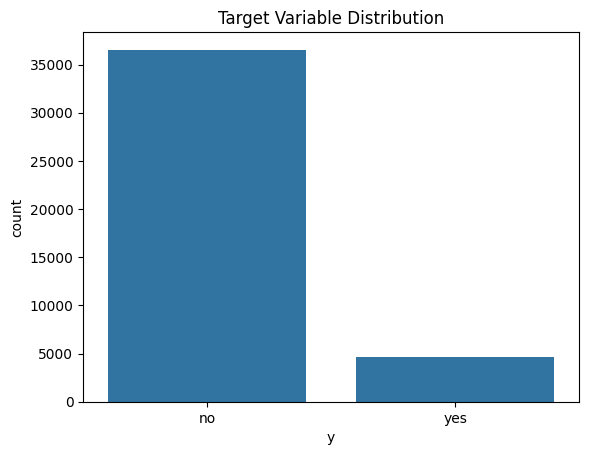

In [6]:
# Check basic info and class distribution
print(df.info())
print(df['y'].value_counts(normalize=True))

sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()


## Data Preprocessing
- Encode categorical variables  
- Standardize numeric features  
- Split dataset into training and testing sets


In [7]:
# Define features and target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Model Building
We will train two models:
1. Logistic Regression  
2. Random Forest Classifier  


In [8]:
# Logistic Regression model
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(max_iter=500))])
log_reg.fit(X_train, y_train)

# Random Forest model
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])
rf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation
We will use the following metrics:  
- Confusion Matrix  
- F1-Score  
- ROC-AUC Curve  



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



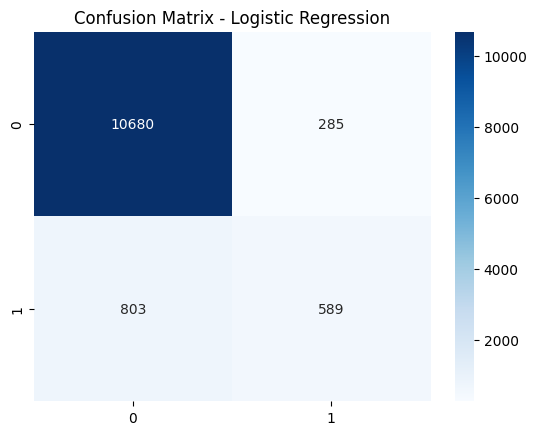


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.68      0.50      0.57      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.73      0.76     12357
weighted avg       0.91      0.92      0.91     12357



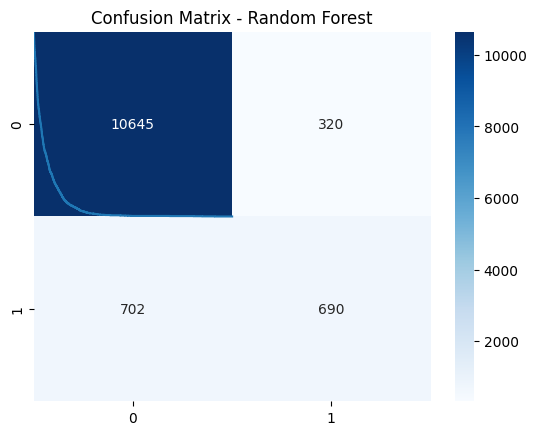

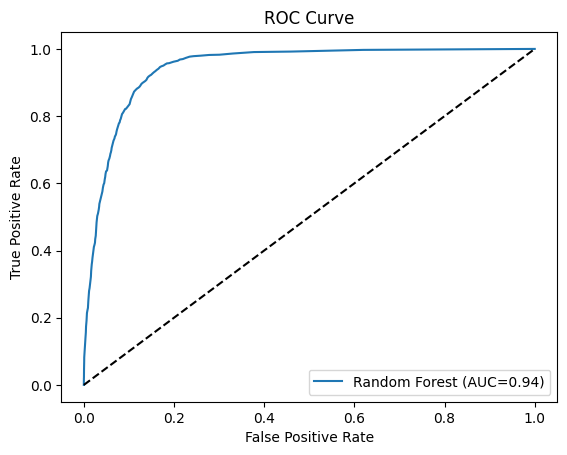

In [9]:
# Evaluate both models
for model, name in zip([log_reg, rf], ["Logistic Regression", "Random Forest"]):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Explainable AI (XAI)
We will use **SHAP** to interpret model predictions.  
- Global feature importance  
- Local explanation of 5 predictions  


In [10]:
# Explain one prediction (first row in test set)
i = 0
exp = explainer.explain_instance(
    data_row=X_test_transformed[i].toarray()[0] if hasattr(X_test_transformed[i], "toarray") else X_test_transformed[i],
    predict_fn=rf.named_steps['classifier'].predict_proba
)

# ---- SAFE OUTPUT (text instead of HTML) ----
print("Explanation for one prediction (Test sample 0):")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

# Explain first 5 customers (text output only)
for i in range(5):
    exp = explainer.explain_instance(
        data_row=X_test_transformed[i].toarray()[0] if hasattr(X_test_transformed[i], "toarray") else X_test_transformed[i],
        predict_fn=rf.named_steps['classifier'].predict_proba
    )
    print(f"\nExplanation for test sample {i}:")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")
    print("="*60)





Explanation for one prediction (Test sample 0):
num__duration <= -0.60: -0.1643
cat__month_oct <= 0.00: -0.1079
0.33 < num__nr.employed <= 0.84: -0.0603
0.65 < num__emp.var.rate <= 0.84: -0.0510
cat__month_mar <= 0.00: -0.0486
cat__poutcome_success <= 0.00: -0.0457
cat__job_unknown <= 0.00: -0.0429
cat__marital_unknown <= 0.00: -0.0418
cat__loan_unknown <= 0.00: -0.0198
cat__education_illiterate <= 0.00: -0.0189

Explanation for test sample 0:
num__duration <= -0.60: -0.1621
cat__month_oct <= 0.00: -0.0944
0.33 < num__nr.employed <= 0.84: -0.0646
cat__month_mar <= 0.00: -0.0631
0.65 < num__emp.var.rate <= 0.84: -0.0618
cat__education_illiterate <= 0.00: -0.0360
cat__marital_unknown <= 0.00: -0.0357
cat__month_sep <= 0.00: -0.0279
cat__month_dec <= 0.00: 0.0238
cat__default_yes <= 0.00: -0.0048

Explanation for test sample 1:
-0.60 < num__duration <= -0.30: -0.1008
cat__month_oct <= 0.00: -0.0850
-0.94 < num__nr.employed <= 0.33: -0.0506
cat__month_mar <= 0.00: -0.0482
cat__month_sep <=

## Conclusion
We trained Logistic Regression and Random Forest models on the Bank Marketing dataset.  
We evaluated them using confusion matrix, F1-score, and ROC curve.  
SHAP analysis helped us interpret which features most influenced customer subscription decisions.  
